In [4]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
import xgboost as xgb

In [24]:
from keras.callbacks import ModelCheckpoint,CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [7]:
from matplotlib import pyplot
%matplotlib inline

In [8]:
data_folder = '../data'
data_files = os.listdir(data_folder)

In [9]:
year_2014 = pd.read_csv(data_folder+'/'+data_files[0])
year_2014.head()

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,SUNY,22306,-,-,India,24.65,73.75,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown
1,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,0,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,1,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,2,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
new_columns = year_2014.iloc[1]
year_all = year_2014[2:]
year_all.columns =new_columns
year = year_all.loc[:, year_all.columns.notnull()]

# for counter,i in enumerate(new_columns):
#     print(i)


year = year.drop(columns=['Year','Month','Day','Minute','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag','Dew Point','Clearsky GHI','Solar Zenith Angle','Wind Direction','Snow Depth','Precipitable Water'])

In [11]:
year = year.astype('float64')
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 2 to 8761
Data columns (total 6 columns):
Hour                 8760 non-null float64
GHI                  8760 non-null float64
Temperature          8760 non-null float64
Pressure             8760 non-null float64
Relative Humidity    8760 non-null float64
Wind Speed           8760 non-null float64
dtypes: float64(6)
memory usage: 410.7 KB


In [12]:
X = year.drop(columns=['GHI'])
Y = year.pop('GHI')

transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)


print(transformer)
print(X_norm)

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=test_size, random_state=seed)

Normalizer(copy=True, norm='l2')
[[0.         0.01328535 0.99804736 0.06085759 0.00461639]
 [0.00104144 0.0127023  0.99744886 0.07008445 0.00463795]
 [0.0020818  0.01228901 0.997055   0.07553548 0.00451282]
 ...
 [0.02189238 0.01564988 0.99889576 0.03825496 0.00443074]
 [0.02293431 0.01486344 0.99867655 0.04333415 0.00451597]
 [0.02396545 0.01406343 0.99830212 0.05098941 0.00456342]]


In [18]:
NN_model_1 = Sequential()

# The Input Layer :
NN_model_1.add(Dense(20, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_1.add(Dense(40, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_1.add(Dense(1, kernel_initializer='normal',activation='linear'))



In [19]:
NN_model_2 = Sequential()

# The Input Layer :
NN_model_2.add(Dense(20, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_2.add(Dense(40, kernel_initializer='normal',activation='relu'))
NN_model_2.add(Dense(60, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_2.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [27]:
models = [NN_model_1,NN_model_2]
for counter,model in enumerate(models):
    # Compile the network :
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    csv_logger = CSVLogger(str('model')+str(1)+'.log')
    model.fit(X_norm, Y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])

Train on 7008 samples, validate on 1752 samples
Epoch 1/500
7008/7008 [==============================] - 1s 91us/step - loss: 49315.6808 - mean_squared_error: 49315.6808 - val_loss: 26289.6976 - val_mean_squared_error: 26289.6976
Epoch 2/500
7008/7008 [==============================] - 0s 58us/step - loss: 49342.6377 - mean_squared_error: 49342.6377 - val_loss: 26489.3108 - val_mean_squared_error: 26489.3108
Epoch 3/500
7008/7008 [==============================] - 0s 60us/step - loss: 49335.6559 - mean_squared_error: 49335.6559 - val_loss: 27859.7809 - val_mean_squared_error: 27859.7809
Epoch 4/500
7008/7008 [==============================] - 0s 61us/step - loss: 49101.8235 - mean_squared_error: 49101.8235 - val_loss: 28264.5226 - val_mean_squared_error: 28264.5226
Epoch 5/500
7008/7008 [==============================] - 0s 61us/step - loss: 49022.2879 - mean_squared_error: 49022.2879 - val_loss: 28494.9398 - val_mean_squared_error: 28494.9398
Epoch 6/500
7008/7008 [===================

7008/7008 [==============================] - 0s 58us/step - loss: 47166.2181 - mean_squared_error: 47166.2181 - val_loss: 28377.7623 - val_mean_squared_error: 28377.7623
Epoch 46/500
7008/7008 [==============================] - 0s 59us/step - loss: 47035.3669 - mean_squared_error: 47035.3669 - val_loss: 29394.1980 - val_mean_squared_error: 29394.1980
Epoch 47/500
7008/7008 [==============================] - 0s 60us/step - loss: 46930.0064 - mean_squared_error: 46930.0064 - val_loss: 25133.6281 - val_mean_squared_error: 25133.6281
Epoch 48/500
7008/7008 [==============================] - 0s 60us/step - loss: 47069.4910 - mean_squared_error: 47069.4910 - val_loss: 25877.5285 - val_mean_squared_error: 25877.5285
Epoch 49/500
7008/7008 [==============================] - 0s 59us/step - loss: 47002.8875 - mean_squared_error: 47002.8875 - val_loss: 27189.0687 - val_mean_squared_error: 27189.0687
Epoch 50/500
7008/7008 [==============================] - 0s 59us/step - loss: 46975.7990 - mean_s

Epoch 90/500
7008/7008 [==============================] - 0s 57us/step - loss: 46247.3434 - mean_squared_error: 46247.3434 - val_loss: 24869.9898 - val_mean_squared_error: 24869.9898
Epoch 91/500
7008/7008 [==============================] - 0s 57us/step - loss: 46131.1621 - mean_squared_error: 46131.1621 - val_loss: 24434.4351 - val_mean_squared_error: 24434.4351
Epoch 92/500
7008/7008 [==============================] - 0s 59us/step - loss: 46056.0430 - mean_squared_error: 46056.0430 - val_loss: 27149.7204 - val_mean_squared_error: 27149.7204
Epoch 93/500
7008/7008 [==============================] - 0s 57us/step - loss: 46168.1721 - mean_squared_error: 46168.1721 - val_loss: 25917.0512 - val_mean_squared_error: 25917.0512
Epoch 94/500
7008/7008 [==============================] - 0s 60us/step - loss: 46113.0785 - mean_squared_error: 46113.0785 - val_loss: 24712.7920 - val_mean_squared_error: 24712.7920
Epoch 95/500
7008/7008 [==============================] - 0s 61us/step - loss: 46050.

7008/7008 [==============================] - 0s 60us/step - loss: 45604.8384 - mean_squared_error: 45604.8384 - val_loss: 22273.8138 - val_mean_squared_error: 22273.8138
Epoch 135/500
7008/7008 [==============================] - 0s 59us/step - loss: 45530.7070 - mean_squared_error: 45530.7070 - val_loss: 23972.4254 - val_mean_squared_error: 23972.4254
Epoch 136/500
7008/7008 [==============================] - 0s 60us/step - loss: 45598.7608 - mean_squared_error: 45598.7608 - val_loss: 23691.6737 - val_mean_squared_error: 23691.6737
Epoch 137/500
7008/7008 [==============================] - 0s 60us/step - loss: 45465.3607 - mean_squared_error: 45465.3607 - val_loss: 25648.1987 - val_mean_squared_error: 25648.1987
Epoch 138/500
7008/7008 [==============================] - 0s 60us/step - loss: 45607.1691 - mean_squared_error: 45607.1691 - val_loss: 23369.6520 - val_mean_squared_error: 23369.6520
Epoch 139/500
7008/7008 [==============================] - 0s 58us/step - loss: 45495.4753 - m

7008/7008 [==============================] - 0s 59us/step - loss: 45062.0356 - mean_squared_error: 45062.0356 - val_loss: 22307.4204 - val_mean_squared_error: 22307.4204
Epoch 179/500
7008/7008 [==============================] - 0s 58us/step - loss: 45043.1216 - mean_squared_error: 45043.1216 - val_loss: 22806.7237 - val_mean_squared_error: 22806.7237
Epoch 180/500
7008/7008 [==============================] - 0s 60us/step - loss: 45020.7741 - mean_squared_error: 45020.7741 - val_loss: 23287.3645 - val_mean_squared_error: 23287.3645
Epoch 181/500
7008/7008 [==============================] - 0s 60us/step - loss: 45002.8264 - mean_squared_error: 45002.8264 - val_loss: 23816.2599 - val_mean_squared_error: 23816.2599
Epoch 182/500
7008/7008 [==============================] - 0s 61us/step - loss: 45012.1224 - mean_squared_error: 45012.1224 - val_loss: 23717.6988 - val_mean_squared_error: 23717.6988
Epoch 183/500
7008/7008 [==============================] - 0s 60us/step - loss: 45018.9383 - m

7008/7008 [==============================] - 0s 59us/step - loss: 44445.7888 - mean_squared_error: 44445.7888 - val_loss: 23399.5272 - val_mean_squared_error: 23399.5272
Epoch 223/500
7008/7008 [==============================] - 0s 60us/step - loss: 44593.5270 - mean_squared_error: 44593.5270 - val_loss: 24420.1228 - val_mean_squared_error: 24420.1228
Epoch 224/500
7008/7008 [==============================] - 0s 58us/step - loss: 44552.6495 - mean_squared_error: 44552.6495 - val_loss: 19802.5703 - val_mean_squared_error: 19802.5703
Epoch 225/500
7008/7008 [==============================] - 0s 60us/step - loss: 44636.1004 - mean_squared_error: 44636.1004 - val_loss: 22958.8236 - val_mean_squared_error: 22958.8236
Epoch 226/500
7008/7008 [==============================] - 0s 60us/step - loss: 44508.5661 - mean_squared_error: 44508.5661 - val_loss: 24903.4941 - val_mean_squared_error: 24903.4941
Epoch 227/500
7008/7008 [==============================] - 0s 59us/step - loss: 44533.3517 - m

7008/7008 [==============================] - 0s 58us/step - loss: 44046.4697 - mean_squared_error: 44046.4697 - val_loss: 20306.6163 - val_mean_squared_error: 20306.6163
Epoch 267/500
7008/7008 [==============================] - 0s 60us/step - loss: 44040.6279 - mean_squared_error: 44040.6279 - val_loss: 19823.3540 - val_mean_squared_error: 19823.3540
Epoch 268/500
7008/7008 [==============================] - 0s 58us/step - loss: 43957.7771 - mean_squared_error: 43957.7771 - val_loss: 24605.5830 - val_mean_squared_error: 24605.5830
Epoch 269/500
7008/7008 [==============================] - 0s 59us/step - loss: 43971.9845 - mean_squared_error: 43971.9845 - val_loss: 20646.7406 - val_mean_squared_error: 20646.7406
Epoch 270/500
7008/7008 [==============================] - 0s 60us/step - loss: 43936.6359 - mean_squared_error: 43936.6359 - val_loss: 20221.5366 - val_mean_squared_error: 20221.5366
Epoch 271/500
7008/7008 [==============================] - 0s 58us/step - loss: 43964.3214 - m

7008/7008 [==============================] - 0s 59us/step - loss: 43420.9124 - mean_squared_error: 43420.9124 - val_loss: 19738.5218 - val_mean_squared_error: 19738.5218
Epoch 311/500
7008/7008 [==============================] - 0s 60us/step - loss: 43485.7138 - mean_squared_error: 43485.7138 - val_loss: 21158.8526 - val_mean_squared_error: 21158.8526
Epoch 312/500
7008/7008 [==============================] - 0s 59us/step - loss: 43494.0796 - mean_squared_error: 43494.0796 - val_loss: 18827.0811 - val_mean_squared_error: 18827.0811
Epoch 313/500
7008/7008 [==============================] - 0s 60us/step - loss: 43497.0001 - mean_squared_error: 43497.0001 - val_loss: 21213.3673 - val_mean_squared_error: 21213.3673
Epoch 314/500
7008/7008 [==============================] - 0s 61us/step - loss: 43472.3758 - mean_squared_error: 43472.3758 - val_loss: 20461.7418 - val_mean_squared_error: 20461.7418
Epoch 315/500
7008/7008 [==============================] - 0s 59us/step - loss: 43489.3526 - m

7008/7008 [==============================] - 0s 56us/step - loss: 43050.6970 - mean_squared_error: 43050.6970 - val_loss: 21147.6267 - val_mean_squared_error: 21147.6267
Epoch 355/500
7008/7008 [==============================] - 0s 56us/step - loss: 43027.3665 - mean_squared_error: 43027.3665 - val_loss: 20432.5294 - val_mean_squared_error: 20432.5294
Epoch 356/500
7008/7008 [==============================] - 0s 58us/step - loss: 43183.9356 - mean_squared_error: 43183.9356 - val_loss: 20586.8798 - val_mean_squared_error: 20586.8798
Epoch 357/500
7008/7008 [==============================] - 0s 58us/step - loss: 42988.4418 - mean_squared_error: 42988.4418 - val_loss: 19884.0021 - val_mean_squared_error: 19884.0021
Epoch 358/500
7008/7008 [==============================] - 0s 57us/step - loss: 43027.3193 - mean_squared_error: 43027.3193 - val_loss: 18925.4446 - val_mean_squared_error: 18925.4446
Epoch 359/500
7008/7008 [==============================] - 0s 57us/step - loss: 42987.1563 - m

7008/7008 [==============================] - 0s 58us/step - loss: 42530.6166 - mean_squared_error: 42530.6166 - val_loss: 20210.4528 - val_mean_squared_error: 20210.4528
Epoch 399/500
7008/7008 [==============================] - 0s 57us/step - loss: 42575.7672 - mean_squared_error: 42575.7672 - val_loss: 19671.1155 - val_mean_squared_error: 19671.1155
Epoch 400/500
7008/7008 [==============================] - 0s 57us/step - loss: 42702.1696 - mean_squared_error: 42702.1696 - val_loss: 21842.4582 - val_mean_squared_error: 21842.4582
Epoch 401/500
7008/7008 [==============================] - 0s 57us/step - loss: 42717.4366 - mean_squared_error: 42717.4366 - val_loss: 18573.7391 - val_mean_squared_error: 18573.7391
Epoch 402/500
7008/7008 [==============================] - 0s 57us/step - loss: 42595.3524 - mean_squared_error: 42595.3524 - val_loss: 20172.9378 - val_mean_squared_error: 20172.9378
Epoch 403/500
7008/7008 [==============================] - 0s 57us/step - loss: 42545.3692 - m

7008/7008 [==============================] - 0s 57us/step - loss: 42230.9890 - mean_squared_error: 42230.9890 - val_loss: 19316.7174 - val_mean_squared_error: 19316.7174
Epoch 443/500
7008/7008 [==============================] - 0s 54us/step - loss: 42368.6246 - mean_squared_error: 42368.6246 - val_loss: 20119.9530 - val_mean_squared_error: 20119.9530
Epoch 444/500
7008/7008 [==============================] - 0s 57us/step - loss: 42252.3920 - mean_squared_error: 42252.3920 - val_loss: 20499.0596 - val_mean_squared_error: 20499.0596
Epoch 445/500
7008/7008 [==============================] - 0s 58us/step - loss: 42300.1333 - mean_squared_error: 42300.1333 - val_loss: 19822.9336 - val_mean_squared_error: 19822.9336
Epoch 446/500
7008/7008 [==============================] - 0s 57us/step - loss: 42138.3066 - mean_squared_error: 42138.3066 - val_loss: 18974.1037 - val_mean_squared_error: 18974.1037
Epoch 447/500
7008/7008 [==============================] - 0s 57us/step - loss: 42181.9336 - m

7008/7008 [==============================] - 0s 56us/step - loss: 41773.9500 - mean_squared_error: 41773.9500 - val_loss: 21918.5287 - val_mean_squared_error: 21918.5287
Epoch 487/500
7008/7008 [==============================] - 0s 58us/step - loss: 41776.3666 - mean_squared_error: 41776.3666 - val_loss: 19604.8418 - val_mean_squared_error: 19604.8418
Epoch 488/500
7008/7008 [==============================] - 0s 55us/step - loss: 41765.1890 - mean_squared_error: 41765.1890 - val_loss: 18842.7592 - val_mean_squared_error: 18842.7592
Epoch 489/500
7008/7008 [==============================] - 0s 56us/step - loss: 41642.7122 - mean_squared_error: 41642.7122 - val_loss: 20096.0320 - val_mean_squared_error: 20096.0320
Epoch 490/500
7008/7008 [==============================] - 0s 56us/step - loss: 41901.4884 - mean_squared_error: 41901.4884 - val_loss: 19851.8254 - val_mean_squared_error: 19851.8254
Epoch 491/500
7008/7008 [==============================] - 0s 59us/step - loss: 41720.1338 - m

7008/7008 [==============================] - 0s 64us/step - loss: 48372.6342 - mean_squared_error: 48372.6342 - val_loss: 34870.1850 - val_mean_squared_error: 34870.1850
Epoch 31/500
7008/7008 [==============================] - 0s 63us/step - loss: 48822.7306 - mean_squared_error: 48822.7306 - val_loss: 29662.8922 - val_mean_squared_error: 29662.8922
Epoch 32/500
7008/7008 [==============================] - 0s 64us/step - loss: 48000.9574 - mean_squared_error: 48000.9574 - val_loss: 27008.7534 - val_mean_squared_error: 27008.7534
Epoch 33/500
7008/7008 [==============================] - 0s 64us/step - loss: 47898.2620 - mean_squared_error: 47898.2620 - val_loss: 27791.8029 - val_mean_squared_error: 27791.8029
Epoch 34/500
7008/7008 [==============================] - 0s 63us/step - loss: 47900.6675 - mean_squared_error: 47900.6675 - val_loss: 26939.0202 - val_mean_squared_error: 26939.0202
Epoch 35/500
7008/7008 [==============================] - 0s 65us/step - loss: 47826.0314 - mean_s

Epoch 75/500
7008/7008 [==============================] - 0s 63us/step - loss: 45118.4542 - mean_squared_error: 45118.4542 - val_loss: 26750.2409 - val_mean_squared_error: 26750.2409
Epoch 76/500
7008/7008 [==============================] - 0s 65us/step - loss: 45010.4630 - mean_squared_error: 45010.4630 - val_loss: 21556.7965 - val_mean_squared_error: 21556.7965
Epoch 77/500
7008/7008 [==============================] - 0s 65us/step - loss: 45249.1757 - mean_squared_error: 45249.1757 - val_loss: 27126.1762 - val_mean_squared_error: 27126.1762
Epoch 78/500
7008/7008 [==============================] - 0s 64us/step - loss: 44773.9598 - mean_squared_error: 44773.9598 - val_loss: 27817.9574 - val_mean_squared_error: 27817.9574
Epoch 79/500
7008/7008 [==============================] - 0s 65us/step - loss: 45272.2953 - mean_squared_error: 45272.2953 - val_loss: 22766.4773 - val_mean_squared_error: 22766.4773
Epoch 80/500
7008/7008 [==============================] - 0s 64us/step - loss: 45109.

Epoch 120/500
7008/7008 [==============================] - 0s 64us/step - loss: 42870.7640 - mean_squared_error: 42870.7640 - val_loss: 19578.5534 - val_mean_squared_error: 19578.5534
Epoch 121/500
7008/7008 [==============================] - 0s 64us/step - loss: 42849.4332 - mean_squared_error: 42849.4332 - val_loss: 25870.6863 - val_mean_squared_error: 25870.6863
Epoch 122/500
7008/7008 [==============================] - 0s 64us/step - loss: 42942.1854 - mean_squared_error: 42942.1854 - val_loss: 17790.7741 - val_mean_squared_error: 17790.7741
Epoch 123/500
7008/7008 [==============================] - 0s 65us/step - loss: 42854.5707 - mean_squared_error: 42854.5707 - val_loss: 20861.1031 - val_mean_squared_error: 20861.1031
Epoch 124/500
7008/7008 [==============================] - 0s 64us/step - loss: 42767.3175 - mean_squared_error: 42767.3175 - val_loss: 20463.1841 - val_mean_squared_error: 20463.1841
Epoch 125/500
7008/7008 [==============================] - 0s 65us/step - loss: 

7008/7008 [==============================] - 0s 65us/step - loss: 40996.4394 - mean_squared_error: 40996.4394 - val_loss: 19898.2662 - val_mean_squared_error: 19898.2662
Epoch 165/500
7008/7008 [==============================] - 0s 65us/step - loss: 40937.1939 - mean_squared_error: 40937.1939 - val_loss: 28077.1340 - val_mean_squared_error: 28077.1340
Epoch 166/500
7008/7008 [==============================] - 0s 65us/step - loss: 40991.3935 - mean_squared_error: 40991.3935 - val_loss: 16391.4042 - val_mean_squared_error: 16391.4042
Epoch 167/500
7008/7008 [==============================] - 0s 64us/step - loss: 40778.9747 - mean_squared_error: 40778.9747 - val_loss: 17173.8412 - val_mean_squared_error: 17173.8412
Epoch 168/500
7008/7008 [==============================] - 0s 66us/step - loss: 40833.2331 - mean_squared_error: 40833.2331 - val_loss: 22525.5550 - val_mean_squared_error: 22525.5550
Epoch 169/500
7008/7008 [==============================] - 0s 64us/step - loss: 40985.7940 - m

7008/7008 [==============================] - 0s 64us/step - loss: 39464.3996 - mean_squared_error: 39464.3996 - val_loss: 17927.8656 - val_mean_squared_error: 17927.8656
Epoch 209/500
7008/7008 [==============================] - 0s 64us/step - loss: 39493.8745 - mean_squared_error: 39493.8745 - val_loss: 17941.6860 - val_mean_squared_error: 17941.6860
Epoch 210/500
7008/7008 [==============================] - 0s 65us/step - loss: 39775.0446 - mean_squared_error: 39775.0446 - val_loss: 19691.7456 - val_mean_squared_error: 19691.7456
Epoch 211/500
7008/7008 [==============================] - 0s 64us/step - loss: 39261.4726 - mean_squared_error: 39261.4726 - val_loss: 17365.6335 - val_mean_squared_error: 17365.6335
Epoch 212/500
7008/7008 [==============================] - 0s 64us/step - loss: 39690.9414 - mean_squared_error: 39690.9414 - val_loss: 21963.3470 - val_mean_squared_error: 21963.3470
Epoch 213/500
7008/7008 [==============================] - 0s 64us/step - loss: 39770.2141 - m

7008/7008 [==============================] - 0s 65us/step - loss: 37128.5554 - mean_squared_error: 37128.5554 - val_loss: 14523.6353 - val_mean_squared_error: 14523.6353
Epoch 253/500
7008/7008 [==============================] - 0s 64us/step - loss: 37229.9691 - mean_squared_error: 37229.9691 - val_loss: 17761.9423 - val_mean_squared_error: 17761.9423
Epoch 254/500
7008/7008 [==============================] - 0s 65us/step - loss: 37086.7300 - mean_squared_error: 37086.7300 - val_loss: 16421.6452 - val_mean_squared_error: 16421.6452
Epoch 255/500
7008/7008 [==============================] - 0s 64us/step - loss: 36873.5812 - mean_squared_error: 36873.5812 - val_loss: 18536.2612 - val_mean_squared_error: 18536.2612
Epoch 256/500
7008/7008 [==============================] - 0s 63us/step - loss: 37059.4080 - mean_squared_error: 37059.4080 - val_loss: 23755.0064 - val_mean_squared_error: 23755.0064
Epoch 257/500
7008/7008 [==============================] - 0s 64us/step - loss: 36601.6838 - m

7008/7008 [==============================] - 0s 64us/step - loss: 29022.3327 - mean_squared_error: 29022.3327 - val_loss: 17816.8260 - val_mean_squared_error: 17816.8260
Epoch 297/500
7008/7008 [==============================] - 0s 64us/step - loss: 28481.4982 - mean_squared_error: 28481.4982 - val_loss: 18347.2007 - val_mean_squared_error: 18347.2007
Epoch 298/500
7008/7008 [==============================] - 0s 65us/step - loss: 28366.1330 - mean_squared_error: 28366.1330 - val_loss: 16603.0054 - val_mean_squared_error: 16603.0054
Epoch 299/500
7008/7008 [==============================] - 0s 64us/step - loss: 28443.9064 - mean_squared_error: 28443.9064 - val_loss: 17939.5868 - val_mean_squared_error: 17939.5868
Epoch 300/500
7008/7008 [==============================] - 0s 65us/step - loss: 27951.7438 - mean_squared_error: 27951.7438 - val_loss: 16707.4326 - val_mean_squared_error: 16707.4326
Epoch 301/500
7008/7008 [==============================] - 0s 64us/step - loss: 28130.7109 - m

7008/7008 [==============================] - 0s 64us/step - loss: 22153.8104 - mean_squared_error: 22153.8104 - val_loss: 15621.0694 - val_mean_squared_error: 15621.0694
Epoch 341/500
7008/7008 [==============================] - 0s 63us/step - loss: 22290.2835 - mean_squared_error: 22290.2835 - val_loss: 14519.6835 - val_mean_squared_error: 14519.6835
Epoch 342/500
7008/7008 [==============================] - 0s 65us/step - loss: 22067.6614 - mean_squared_error: 22067.6614 - val_loss: 15858.5493 - val_mean_squared_error: 15858.5493
Epoch 343/500
7008/7008 [==============================] - 0s 64us/step - loss: 22174.1179 - mean_squared_error: 22174.1179 - val_loss: 15840.9398 - val_mean_squared_error: 15840.9398
Epoch 344/500
7008/7008 [==============================] - 0s 64us/step - loss: 21799.5529 - mean_squared_error: 21799.5529 - val_loss: 14478.9826 - val_mean_squared_error: 14478.9826
Epoch 345/500
7008/7008 [==============================] - 0s 64us/step - loss: 21820.9944 - m

7008/7008 [==============================] - 0s 63us/step - loss: 17969.5464 - mean_squared_error: 17969.5464 - val_loss: 14092.2736 - val_mean_squared_error: 14092.2736
Epoch 385/500
7008/7008 [==============================] - 0s 64us/step - loss: 17781.7495 - mean_squared_error: 17781.7495 - val_loss: 12367.0976 - val_mean_squared_error: 12367.0976
Epoch 386/500
7008/7008 [==============================] - 0s 64us/step - loss: 17759.1178 - mean_squared_error: 17759.1178 - val_loss: 14498.6289 - val_mean_squared_error: 14498.6289
Epoch 387/500
7008/7008 [==============================] - 0s 65us/step - loss: 17786.3917 - mean_squared_error: 17786.3917 - val_loss: 12777.0256 - val_mean_squared_error: 12777.0256
Epoch 388/500
7008/7008 [==============================] - 0s 64us/step - loss: 17373.8907 - mean_squared_error: 17373.8907 - val_loss: 13037.8616 - val_mean_squared_error: 13037.8616
Epoch 389/500
7008/7008 [==============================] - 0s 65us/step - loss: 17395.1202 - m

7008/7008 [==============================] - 0s 66us/step - loss: 14375.5246 - mean_squared_error: 14375.5246 - val_loss: 11753.4562 - val_mean_squared_error: 11753.4562
Epoch 429/500
7008/7008 [==============================] - 0s 65us/step - loss: 14044.3426 - mean_squared_error: 14044.3426 - val_loss: 12141.0834 - val_mean_squared_error: 12141.0834
Epoch 430/500
7008/7008 [==============================] - 0s 65us/step - loss: 13969.0977 - mean_squared_error: 13969.0977 - val_loss: 11058.9199 - val_mean_squared_error: 11058.9199
Epoch 431/500
7008/7008 [==============================] - 0s 64us/step - loss: 14043.4107 - mean_squared_error: 14043.4107 - val_loss: 11342.7521 - val_mean_squared_error: 11342.7521
Epoch 432/500
7008/7008 [==============================] - 0s 64us/step - loss: 13887.1692 - mean_squared_error: 13887.1692 - val_loss: 11724.7952 - val_mean_squared_error: 11724.7952
Epoch 433/500
7008/7008 [==============================] - 0s 64us/step - loss: 13897.3203 - m

Epoch 473/500
7008/7008 [==============================] - 0s 65us/step - loss: 12039.7708 - mean_squared_error: 12039.7708 - val_loss: 10331.1220 - val_mean_squared_error: 10331.1220
Epoch 474/500
7008/7008 [==============================] - 0s 64us/step - loss: 12046.6424 - mean_squared_error: 12046.6424 - val_loss: 12207.5314 - val_mean_squared_error: 12207.5314
Epoch 475/500
7008/7008 [==============================] - 0s 65us/step - loss: 12086.0020 - mean_squared_error: 12086.0020 - val_loss: 10245.8143 - val_mean_squared_error: 10245.8143
Epoch 476/500
7008/7008 [==============================] - 0s 64us/step - loss: 11830.2541 - mean_squared_error: 11830.2541 - val_loss: 11580.4447 - val_mean_squared_error: 11580.4447
Epoch 477/500
7008/7008 [==============================] - 0s 63us/step - loss: 11771.8331 - mean_squared_error: 11771.8331 - val_loss: 10678.9607 - val_mean_squared_error: 10678.9607
Epoch 478/500
7008/7008 [==============================] - 0s 63us/step - loss: 

In [21]:
# checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 2, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

In [23]:
NN_model.fit(X_norm, Y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 7008 samples, validate on 1752 samples
Epoch 1/500
7008/7008 [==============================] - 1s 172us/step - loss: 115617.3037 - mean_squared_error: 115617.3037 - val_loss: 71530.7802 - val_mean_squared_error: 71530.7802

Epoch 00001: val_loss improved from inf to 71530.78022, saving model to Weights-001--71530.78022.hdf5
Epoch 2/500
7008/7008 [==============================] - 1s 118us/step - loss: 102258.1054 - mean_squared_error: 102258.1054 - val_loss: 67763.5923 - val_mean_squared_error: 67763.5923

Epoch 00002: val_loss improved from 71530.78022 to 67763.59231, saving model to Weights-002--67763.59231.hdf5
Epoch 3/500
7008/7008 [==============================] - 1s 118us/step - loss: 89691.6922 - mean_squared_error: 89691.6922 - val_loss: 44799.3447 - val_mean_squared_error: 44799.3447

Epoch 00003: val_loss improved from 67763.59231 to 44799.34470, saving model to Weights-003--44799.34470.hdf5
Epoch 4/500
7008/7008 [==============================] - 1s 120us/step - l


Epoch 00032: val_loss improved from 16540.32582 to 14589.28718, saving model to Weights-032--14589.28718.hdf5
Epoch 33/500
7008/7008 [==============================] - 1s 112us/step - loss: 44122.3785 - mean_squared_error: 44122.3785 - val_loss: 31231.7319 - val_mean_squared_error: 31231.7319

Epoch 00033: val_loss did not improve from 14589.28718
Epoch 34/500
7008/7008 [==============================] - 1s 122us/step - loss: 45020.4138 - mean_squared_error: 45020.4138 - val_loss: 18318.7367 - val_mean_squared_error: 18318.7367

Epoch 00034: val_loss did not improve from 14589.28718
Epoch 35/500
7008/7008 [==============================] - 1s 118us/step - loss: 44667.2794 - mean_squared_error: 44667.2794 - val_loss: 21489.4695 - val_mean_squared_error: 21489.4695

Epoch 00035: val_loss did not improve from 14589.28718
Epoch 36/500
7008/7008 [==============================] - 1s 117us/step - loss: 43356.1242 - mean_squared_error: 43356.1242 - val_loss: 20793.4241 - val_mean_squared_err


Epoch 00066: val_loss did not improve from 14589.28718
Epoch 67/500
7008/7008 [==============================] - 1s 117us/step - loss: 35469.3498 - mean_squared_error: 35469.3498 - val_loss: 25188.3736 - val_mean_squared_error: 25188.3736

Epoch 00067: val_loss did not improve from 14589.28718
Epoch 68/500
7008/7008 [==============================] - 1s 115us/step - loss: 36091.3572 - mean_squared_error: 36091.3572 - val_loss: 21878.5611 - val_mean_squared_error: 21878.5611

Epoch 00068: val_loss did not improve from 14589.28718
Epoch 69/500
7008/7008 [==============================] - 1s 120us/step - loss: 37791.2670 - mean_squared_error: 37791.2670 - val_loss: 20990.8356 - val_mean_squared_error: 20990.8356

Epoch 00069: val_loss did not improve from 14589.28718
Epoch 70/500
7008/7008 [==============================] - 1s 120us/step - loss: 35778.0092 - mean_squared_error: 35778.0092 - val_loss: 15277.7799 - val_mean_squared_error: 15277.7799

Epoch 00070: val_loss did not improve f

Epoch 100/500
7008/7008 [==============================] - 1s 112us/step - loss: 16938.5214 - mean_squared_error: 16938.5214 - val_loss: 6860.7417 - val_mean_squared_error: 6860.7417

Epoch 00100: val_loss improved from 8286.81330 to 6860.74168, saving model to Weights-100--6860.74168.hdf5
Epoch 101/500
7008/7008 [==============================] - 1s 119us/step - loss: 15379.1754 - mean_squared_error: 15379.1754 - val_loss: 5992.9768 - val_mean_squared_error: 5992.9768

Epoch 00101: val_loss improved from 6860.74168 to 5992.97682, saving model to Weights-101--5992.97682.hdf5
Epoch 102/500
7008/7008 [==============================] - 1s 120us/step - loss: 14571.6663 - mean_squared_error: 14571.6663 - val_loss: 5215.4577 - val_mean_squared_error: 5215.4577

Epoch 00102: val_loss improved from 5992.97682 to 5215.45766, saving model to Weights-102--5215.45766.hdf5
Epoch 103/500
7008/7008 [==============================] - 1s 110us/step - loss: 13223.5586 - mean_squared_error: 13223.5586 - 

7008/7008 [==============================] - 1s 115us/step - loss: 6854.1819 - mean_squared_error: 6854.1819 - val_loss: 10036.7488 - val_mean_squared_error: 10036.7488

Epoch 00133: val_loss did not improve from 1873.85747
Epoch 134/500
7008/7008 [==============================] - 1s 115us/step - loss: 6898.9863 - mean_squared_error: 6898.9863 - val_loss: 3178.8977 - val_mean_squared_error: 3178.8977

Epoch 00134: val_loss did not improve from 1873.85747
Epoch 135/500
7008/7008 [==============================] - 1s 118us/step - loss: 7062.2077 - mean_squared_error: 7062.2077 - val_loss: 3516.6157 - val_mean_squared_error: 3516.6157

Epoch 00135: val_loss did not improve from 1873.85747
Epoch 136/500
7008/7008 [==============================] - 1s 113us/step - loss: 7196.4591 - mean_squared_error: 7196.4591 - val_loss: 3483.3889 - val_mean_squared_error: 3483.3889

Epoch 00136: val_loss did not improve from 1873.85747
Epoch 137/500
7008/7008 [==============================] - 1s 116us/


Epoch 00201: val_loss did not improve from 1587.51634
Epoch 202/500
7008/7008 [==============================] - 1s 113us/step - loss: 6557.5994 - mean_squared_error: 6557.5994 - val_loss: 3193.8224 - val_mean_squared_error: 3193.8224

Epoch 00202: val_loss did not improve from 1587.51634
Epoch 203/500
7008/7008 [==============================] - 1s 113us/step - loss: 6523.5693 - mean_squared_error: 6523.5693 - val_loss: 10237.9556 - val_mean_squared_error: 10237.9556

Epoch 00203: val_loss did not improve from 1587.51634
Epoch 204/500
7008/7008 [==============================] - 1s 114us/step - loss: 6608.2906 - mean_squared_error: 6608.2906 - val_loss: 3744.7224 - val_mean_squared_error: 3744.7224

Epoch 00204: val_loss did not improve from 1587.51634
Epoch 205/500
7008/7008 [==============================] - 1s 115us/step - loss: 6024.3806 - mean_squared_error: 6024.3806 - val_loss: 5356.1646 - val_mean_squared_error: 5356.1646

Epoch 00205: val_loss did not improve from 1587.51634


Epoch 00270: val_loss did not improve from 1587.51634
Epoch 271/500
7008/7008 [==============================] - 1s 111us/step - loss: 5874.7187 - mean_squared_error: 5874.7187 - val_loss: 3457.1168 - val_mean_squared_error: 3457.1168

Epoch 00271: val_loss did not improve from 1587.51634
Epoch 272/500
7008/7008 [==============================] - 1s 115us/step - loss: 6355.4049 - mean_squared_error: 6355.4049 - val_loss: 2618.6799 - val_mean_squared_error: 2618.6799

Epoch 00272: val_loss did not improve from 1587.51634
Epoch 273/500
7008/7008 [==============================] - 1s 116us/step - loss: 6507.6048 - mean_squared_error: 6507.6048 - val_loss: 2751.3065 - val_mean_squared_error: 2751.3065

Epoch 00273: val_loss did not improve from 1587.51634
Epoch 274/500
7008/7008 [==============================] - 1s 119us/step - loss: 6379.2502 - mean_squared_error: 6379.2502 - val_loss: 3542.3060 - val_mean_squared_error: 3542.3060

Epoch 00274: val_loss did not improve from 1587.51634
E

7008/7008 [==============================] - 1s 109us/step - loss: 5676.9219 - mean_squared_error: 5676.9219 - val_loss: 5788.0845 - val_mean_squared_error: 5788.0845

Epoch 00340: val_loss did not improve from 1498.14475
Epoch 341/500
7008/7008 [==============================] - 1s 127us/step - loss: 5723.2330 - mean_squared_error: 5723.2330 - val_loss: 2410.9737 - val_mean_squared_error: 2410.9737

Epoch 00341: val_loss did not improve from 1498.14475
Epoch 342/500
7008/7008 [==============================] - 1s 109us/step - loss: 5811.0290 - mean_squared_error: 5811.0290 - val_loss: 7965.6644 - val_mean_squared_error: 7965.6644

Epoch 00342: val_loss did not improve from 1498.14475
Epoch 343/500
7008/7008 [==============================] - 1s 115us/step - loss: 6043.9323 - mean_squared_error: 6043.9323 - val_loss: 8042.2541 - val_mean_squared_error: 8042.2541

Epoch 00343: val_loss did not improve from 1498.14475
Epoch 344/500
7008/7008 [==============================] - 1s 110us/st

7008/7008 [==============================] - 1s 113us/step - loss: 5975.2404 - mean_squared_error: 5975.2404 - val_loss: 2419.6062 - val_mean_squared_error: 2419.6062

Epoch 00375: val_loss did not improve from 1498.14475
Epoch 376/500
7008/7008 [==============================] - 1s 121us/step - loss: 5597.9132 - mean_squared_error: 5597.9132 - val_loss: 4113.0486 - val_mean_squared_error: 4113.0486

Epoch 00376: val_loss did not improve from 1498.14475
Epoch 377/500
7008/7008 [==============================] - 1s 112us/step - loss: 5591.6759 - mean_squared_error: 5591.6759 - val_loss: 3450.7560 - val_mean_squared_error: 3450.7560

Epoch 00377: val_loss did not improve from 1498.14475
Epoch 378/500
7008/7008 [==============================] - 1s 113us/step - loss: 5585.4795 - mean_squared_error: 5585.4795 - val_loss: 2146.2887 - val_mean_squared_error: 2146.2887

Epoch 00378: val_loss did not improve from 1498.14475
Epoch 379/500
7008/7008 [==============================] - 1s 116us/st

7008/7008 [==============================] - 1s 118us/step - loss: 5679.0050 - mean_squared_error: 5679.0050 - val_loss: 3848.0286 - val_mean_squared_error: 3848.0286

Epoch 00410: val_loss did not improve from 1498.14475
Epoch 411/500
7008/7008 [==============================] - 1s 109us/step - loss: 5350.0179 - mean_squared_error: 5350.0179 - val_loss: 2227.7534 - val_mean_squared_error: 2227.7534

Epoch 00411: val_loss did not improve from 1498.14475
Epoch 412/500
7008/7008 [==============================] - 1s 129us/step - loss: 5545.7274 - mean_squared_error: 5545.7274 - val_loss: 2801.4359 - val_mean_squared_error: 2801.4359

Epoch 00412: val_loss did not improve from 1498.14475
Epoch 413/500
7008/7008 [==============================] - 1s 102us/step - loss: 5649.3314 - mean_squared_error: 5649.3314 - val_loss: 5796.0690 - val_mean_squared_error: 5796.0690

Epoch 00413: val_loss did not improve from 1498.14475
Epoch 414/500
7008/7008 [==============================] - 1s 130us/st

7008/7008 [==============================] - 1s 107us/step - loss: 5377.0604 - mean_squared_error: 5377.0604 - val_loss: 6879.2405 - val_mean_squared_error: 6879.2405

Epoch 00445: val_loss did not improve from 1498.14475
Epoch 446/500
7008/7008 [==============================] - 1s 116us/step - loss: 5698.5792 - mean_squared_error: 5698.5792 - val_loss: 3875.3383 - val_mean_squared_error: 3875.3383

Epoch 00446: val_loss did not improve from 1498.14475
Epoch 447/500
7008/7008 [==============================] - 1s 110us/step - loss: 5452.8020 - mean_squared_error: 5452.8020 - val_loss: 5445.4616 - val_mean_squared_error: 5445.4616

Epoch 00447: val_loss did not improve from 1498.14475
Epoch 448/500
7008/7008 [==============================] - 1s 119us/step - loss: 5778.7131 - mean_squared_error: 5778.7131 - val_loss: 8150.1830 - val_mean_squared_error: 8150.1830

Epoch 00448: val_loss did not improve from 1498.14475
Epoch 449/500
7008/7008 [==============================] - 1s 111us/st

7008/7008 [==============================] - 1s 110us/step - loss: 5467.3977 - mean_squared_error: 5467.3977 - val_loss: 4223.8935 - val_mean_squared_error: 4223.8935

Epoch 00480: val_loss did not improve from 1498.14475
Epoch 481/500
7008/7008 [==============================] - 1s 116us/step - loss: 5498.4582 - mean_squared_error: 5498.4582 - val_loss: 5935.1486 - val_mean_squared_error: 5935.1486

Epoch 00481: val_loss did not improve from 1498.14475
Epoch 482/500
7008/7008 [==============================] - 1s 113us/step - loss: 5629.8441 - mean_squared_error: 5629.8441 - val_loss: 5631.2771 - val_mean_squared_error: 5631.2771

Epoch 00482: val_loss did not improve from 1498.14475
Epoch 483/500
7008/7008 [==============================] - 1s 115us/step - loss: 5568.7567 - mean_squared_error: 5568.7567 - val_loss: 2903.4048 - val_mean_squared_error: 2903.4048

Epoch 00483: val_loss did not improve from 1498.14475
Epoch 484/500
7008/7008 [==============================] - 1s 113us/st

In [37]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train,verbose=True)

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [65]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot

Best: -5191.401763 using {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
-15045.738833 (6902.886067) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 10}
-7430.039049 (3751.512773) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 20}
-6100.612457 (3411.851410) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}
-5881.371518 (3321.993854) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
-5765.010279 (3254.264527) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 150}
-5711.351909 (3222.241028) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200}
-8715.175070 (5065.101087) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 10}
-5867.526272 (3459.423915) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 20}
-5390.194962 (3221.876390) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
-5311.889469 (3157.196671) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimator

In [39]:
n_estimators = [10, 20 , 50, 100, 150, 200]
max_depth = [2, 4, 6, 8, 10]
learning_rate = [0.2]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold,verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.0s finished
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future versio

Index(['Hour', 'Temperature', 'Pressure', 'Relative Humidity', 'Wind Speed'], dtype='object', name=1)
[0.35092017 0.49877715 0.0178386  0.12251993 0.00994414]


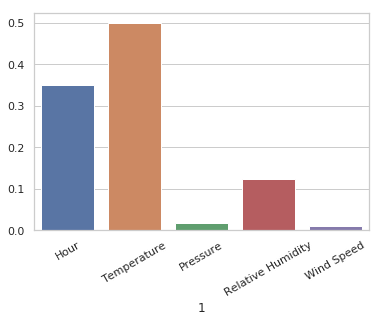

In [71]:
sns.set(style="whitegrid")
print(X.columns)
print(grid_result.best_estimator_.feature_importances_)


sns_plot = sns.barplot(X.columns,grid_result.best_estimator_.feature_importances_)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=30)
fig = sns_plot.get_figure()
fig.savefig("../docs/feature_importance_vertical.png",dpi=200,bbox_inches = "tight")

# sns_plot = sns.barplot(grid_result.best_estimator_.feature_importances_, X.columns)
# fig = sns_plot.get_figure()
# fig.savefig("../docs/feature_importance_horizontal.png",dpi=200,bbox_inches = "tight")

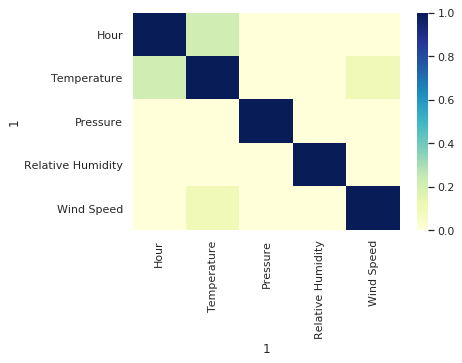

In [66]:
corr_hm = sns.heatmap(X.corr(), 
                xticklabels=X.corr().columns,
                yticklabels=X.corr().columns,vmin=0,vmax=1,cmap="YlGnBu")
plt.show()
# plt.tight_layout()

corr_hm.figure.savefig("../docs/corr_heatmap.png",dpi=200,bbox_inches = "tight")

In [60]:
print("--------------------------------------------------------------------")
print("Best: %f using %s" % (math.sqrt(-grid_result.best_score_), grid_result.best_params_))
print("--------------------------------------------------------------------")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (math.sqrt(-mean), stdev, param))
scores = [math.sqrt(-x) for x in grid_result.cv_results_['mean_test_score']]
scores = np.array(scores).reshape(len(max_depth), len(n_estimators))
%matplotlib notebook
%matplotlib notebook
score = {}
for ind, i in enumerate(max_depth):
    score[i] = scores[ind]

--------------------------------------------------------------------
Best: 72.051383 using {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 50}
--------------------------------------------------------------------
122.661073 (6902.886067) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 10}
86.197674 (3751.512773) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 20}
78.106418 (3411.851410) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}
76.690101 (3321.993854) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
75.927665 (3254.264527) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 150}
75.573487 (3222.241028) with: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200}
93.355102 (5065.101087) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 10}
76.599780 (3459.423915) with: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 20}
73.417947 (3221.876390) with: {'learning_rate': 0.2, 'max_depth':

In [42]:
import numpy as np
from bokeh.models import Label
from bokeh.layouts import gridplot
from bokeh.plotting import figure, save, output_file

p1 = figure()
p1.grid.grid_line_alpha=0.6
p1.xaxis.axis_label = 'n_estimators'
p1.yaxis.axis_label = 'RSME'

p1.line(n_estimators, score[2] , color='#A6CEE3', legend="max_depth:2")
p1.circle(n_estimators, score[2], color='#A6CEE3', legend="max_depth:2")
p1.line(n_estimators, score[4] , color='#000000', legend="max_depth:4")
p1.circle(n_estimators, score[4], color='#000000', legend="max_depth:4")
p1.line(n_estimators, score[6] , color='#FFFF00', legend="max_depth:6")
p1.circle(n_estimators, score[6], color='#FFFF00', legend="max_depth:6")
p1.line(n_estimators, score[8] , color='#00FF00', legend="max_depth:8")
p1.circle(n_estimators, score[8], color='#00FF00', legend="max_depth:8")
p1.line(n_estimators, score[10] , color='#000080', legend="max_depth:10")
p1.circle(n_estimators, score[10], color='#000080', legend="max_depth:10")

output_file("rsme.html", title="RSME Plots")

save(gridplot([[p1]], plot_width=900, plot_height=600))  # open a browser

'/home/primus/durgeshapi/ensemble/src/rsme.html'